<a href="https://colab.research.google.com/github/JoungMinJu/lab_study/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost function과 Activation function이란?

 

Cost function(비용 함수)은 Loss function(손실 함수)이라고도 한다. loss function은 신경망이 '최적의 가중치', 즉 최적의 parameter(매개변수)를 찾게 만드는 '지표'이다. 이 loss function의 값이 클수록 신경망이 적절한 parameter를 찾지 못하는 것이다. 즉 우리는 loss function의 값을 낮추기 위해 노력해야 한다.

 

대표적으로 MSE(Mean Squared Error)와 cross-entropy error가 있다. MSE는 실제값과 예측값의 오차의 제곱합으로, 왜 이런 식의 loss function을 쓰는지 직관적으로 이해가 간다. 직관적인 이해가 가지 않는 cross-entropy error에 대해서 좀 더 살펴보겠다.


Activation function은 이전 레이어들로부터 온 값들, 즉 입력 신호의 총합을 출력 신호로 변환하는 함수이다. activation이라는 단어 자체에서 알 수 있듯이, 입력 신호의 총합이 다음 레이어의 활성화를 일으킬지 말지를 결정한다.

 . 옵티마이저
딥러닝은 뉴런에 적용되는 최적의 가중치 값을 찾기 위해 'gradient descent'라는 방법을 이용한다. 최적의 가중치 값은 손실함수(loss function)를 최소화하는 값이다.
손실함수는 보통 에측값과 실제값의 차이를 말한다. 고등학교 수학시간을 복귀해보면 이차함수의 최소값을 찾기 위해 우리는 미분을 한다. 그렇게 손실함수를 최소값을 찾기 위해서는 미분을 하면 되지만, 그게 어렵기 때문에 값을 바꿔 가면서 어느 지점이 최소값이 찾는 것이다. 이 때 최소값을 찾기 위해 특정 지점에서의 기울기를 이용한다. 그 지점의 기울기의 반대값으로, 즉 아래로 값을 이동하면서 최소값인지 확인하는 것이다.
기본은 이런데, 이 움직이는 범위나 방법에 따라 여러 개의 옵티마이저가 있다. 너무 조금씩 움직이면, 최소값을 찾는데 시간이 오래 걸리고 너무 많이 움직이면 최적의 최소값을 차지 못할 수도 있다. 옵티마이저의  종류에 대해서는 아래 포스팅에 잘 설명이 되어 있으니 참고하기 바란다.


. 활성화 함수(Activation Function)
신경망의 뉴런들을 선형 결합한 하면, 선형 모형이 된다. 이를 비선형 모형으로 결합하기 위해서는 활성화 함수가 필요하다고 한다. 활성화 함수는 x값이 들어왔을 때, 이를 변형하여 출력한다. 활성화함수에 따라 특정 값에서는 0값이 되기도 하고, -1과 1사이의 값이 나오기도 한다. 가장 일반적으로 많이 사용하는 함수는 Relu로, 성능이 가장 잘 나온다고 한다. 그 외에 binary값을 예측하기 위해서는 마지막 뉴런에 sigmoid 함수를 적용한다. 값이 0과 1사이의 값이 나오기 때문이다. 여러 개의 카테고리를 에측한다면, softmax가 좋다고 한다. 다른 카테고리의 출력값과 비교하여, 최종 출력값이 결정되기 때문이다. SoftMax 활성화 함수에 대한 자세한 내용은 아래 포스팅을 참고하면 좋을 듯 하다.

In [1]:
#케라스로 구현하는 로지스틱 회귀
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [4]:
x=np.array([-50,-40,-30,-20,-10,-5,0,5,10,20,30,40,50])
y=np.array([0]*8+[1]*5)

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

#옵티마이저는 경사하강법 sgd를 사용
#손실함수는 binary_crossentrpy를 사용
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['binary_accuracy'])

model.fit(x,y,batch_size=1, epochs=200, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
13/13 [==============================] - 1s 1ms/step - loss: 0.3062 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2888 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2723 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2570 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2430 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2306 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2198 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2108 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2036 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==========================

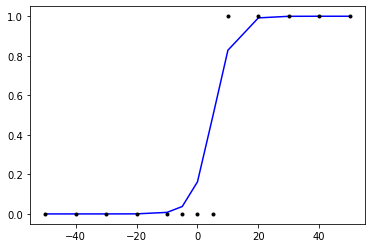

In [6]:
plt.plot(x, model.predict(x), 'b', x,y,'k.')

In [7]:
#x가 5~10 사이일때, y가 0.5 넘기 시작해보이는 듯

#x가 5보다 작을 때 x값이 10보다 클 때에 대해 각각 y값을 출력해보겠다
print(model.predict([1,2,3,4,4.5]))
print(model.predict([11,21,31,41,500]))

[[0.21095091]
 [0.2693373 ]
 [0.3369822 ]
 [0.41203576]
 [0.45141673]]
[[0.869092  ]
 [0.9939709 ]
 [0.99975574]
 [0.99999017]
 [1.        ]]


다중입력에 대한 실습



아래는 다중 선형회귀


In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

#입력벡터의 차원은 3차원
x=np.array([[70,85,11],[71,89,18],[50,80,20],[90,20,10],[50,10,10]]) #중간, 기말, 가산점
#출력벡터의 차원은 1 (최종성적)
y=np.array([73,82,72,57,34])

model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd=optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd, loss='mse',metrics=['mse'])
model.fit(x,y, batch_size=1, epochs=2000, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
5/5 [==============================] - 0s 2ms/step - loss: 481.3163 - mse: 481.3163
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 418.2109 - mse: 418.2109
Epoch 3/2000
5/5 [==============================] - 0s 2ms/step - loss: 362.1721 - mse: 362.1721
Epoch 4/2000
5/5 [==============================] - 0s 2ms/step - loss: 313.6930 - mse: 313.6930
Epoch 5/2000
5/5 [==============================] - 0s 2ms/step - loss: 272.2991 - mse: 272.2991
Epoch 6/2000
5/5 [==============================] - 0s 3ms/step - loss: 237.1580 - mse: 237.1580
Epoch 7/2000
5/5 [==============================] - 0s 2ms/step - loss: 207.3947 - mse: 207.3947
Epoch 8/2000
5/5 [==============================] - 0s 2ms/step - loss: 182.2062 - mse: 182.2062
Epoch 9/2000
5/5 [==============================] - 0s 2ms/step - loss: 160.8914 - mse: 160.8914
Epoch 10/2000
5/5 [==============================] - 0s 2ms/step - loss: 142.8503 - mse: 142.8503
Epoch 11/2000
5/5 [==========

다중 로지스틱 회귀

무슨 꽃에 속하는지 예측


In [11]:
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y=np.array([0, 1, 1, 1])
model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.

# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
model.fit(X, y, batch_size=1, epochs=800, shuffle=False)


Epoch 1/800
4/4 [==============================] - 0s 3ms/step - loss: 0.6045 - binary_accuracy: 0.7500
Epoch 2/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5993 - binary_accuracy: 0.5000
Epoch 3/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5943 - binary_accuracy: 0.5000
Epoch 4/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5894 - binary_accuracy: 0.5000
Epoch 5/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5846 - binary_accuracy: 0.5000
Epoch 6/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5800 - binary_accuracy: 0.5000
Epoch 7/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5755 - binary_accuracy: 0.7500
Epoch 8/800
4/4 [==============================] - 0s 4ms/step - loss: 0.5712 - binary_accuracy: 0.7500
Epoch 9/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5669 - binary_accuracy: 0.7500
Epoch 10/800
4/4 [==============================] - 0s 2ms/step 